In [2]:
!pip install logomaker

  Using cached logomaker-0.8-py2.py3-none-any.whl (11.8 MB)


In [2]:
import logomaker as lm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.utils.utils import get_hyperparameters
from src.models.model35 import nn_model

ROOT_DIR = "../"

model_weights_file = ROOT_DIR + "model_weights/model35_parameters_parameter_274"
parameter_file = ROOT_DIR + "hyperparameters/parameter.txt"

# excute the code
start_time = time.time()

params = get_hyperparameters(parameter_file)

nn = nn_model(hyperparameters=params)
model = nn.create_model()

model.load_weights(model_weights_file)

np.set_printoptions(threshold=sys.maxsize, precision=5, suppress=True)

museum_layer_num = 2
museum_layer = model.layers[museum_layer_num]
_, ic_scaled_prob = museum_layer.get_motifs()

motifs = np.array(ic_scaled_prob)

2022-07-02 17:27:46.789377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-02 17:27:46.789426: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-02 17:27:50.225059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-02 17:27:50.225090: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-02 17:27:50.225113: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (samin-HP-Laptop-15s-eq1xxx): /proc/driver/nvidia/version does not exist
2022-07-02 17:27:50.225652: I tensorflow/core/plat

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 forward (InputLayer)           [(None, 50, 4)]      0           []                               
                                                                                                  
 reverse (InputLayer)           [(None, 50, 4)]      0           []                               
                                                                                                  
 multinomial_convolution_layer   (None, 50, 256)     8448        ['forward[0][0]',                
 (MultinomialConvolutionLayer)                                    'reverse[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 50, 256)      0           ['multinomial_convolution_lay

2022-07-02 17:27:50.643846: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../model_weights/model35_parameters_parameter_274: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


In [5]:
import matplotlib.pyplot as plt
import logomaker as lm

In [6]:
def get_com(motif):
  ic = np.sum(motif, axis=1)
  num = 0
  den = 0
  for i, h in enumerate(ic):
    num += i * h
    den += h
  com = num / den
  return com

In [7]:
def show_motif(arr, outpath=None):

    motif_len = 8
    off = 8 - int(round(get_com(arr))) - 1
    middled_arr = np.zeros((16, 4))
    middled_arr[off:off+motif_len] = arr

    df = pd.DataFrame(middled_arr, columns=['A', 'C', 'G', 'T'])
    logo = lm.Logo(df, 
                   font_name='Arial Rounded MT Bold', 
                   color_scheme={'A': 'tab:red', 'C': 'blue', 'G': 'goldenrod', 'T': 'green'},                    
    )
    logo.ax.set_ylim((0, 2.85))
    logo.baseline_width = 2.0
    logo.style_spines(spines=['top', 'right'], visible=False)
    logo.ax.spines['bottom'].set_bounds((0, 15))
    logo.ax.spines['left'].set_bounds((0, 2))
    logo.style_spines(spines=['bottom', 'left'], linewidth=2)
    logo.ax.xaxis.set_tick_params(width=2)
    logo.ax.yaxis.set_tick_params(width=2)

    logo.ax.set_yticks([0, 2])
    xticks = np.arange(1, 15, 2)
    logo.ax.set_xticks(xticks)
    logo.ax.set_yticklabels(['0', '2'], fontsize=25)
    logo.ax.set_xticklabels([])
    plt.gcf().set_size_inches(4, 2.5)

    if outpath:
      plt.savefig(outpath, format='svg')

    plt.show()

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


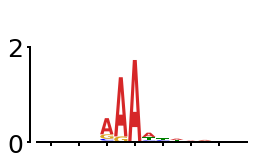

In [8]:
motif_num = 190

show_motif(motifs[motif_num], outpath=None)

In [9]:
get_com(motifs[motif_num])

1.6567715272445505

2 3


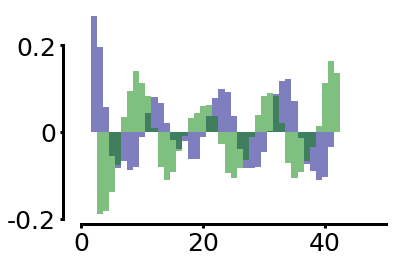

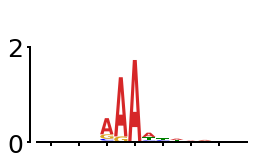

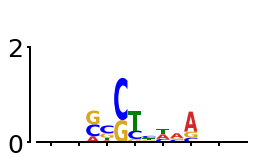

In [10]:
import tensorflow as tf

def plot_second_order_relation(kernel_num, prev_kernel_num_1, prev_kernel_num_2, out_path=None):
    layer_num = 5
    weights_tf = tf.transpose(model.layers[layer_num].get_weights()[0], [2, 0, 1])
    weights = np.array(weights_tf[kernel_num])

    pattern_len = 40
    total_len = 50
    
    pos_weights_1 = np.zeros(total_len)
    pos_weights_2 = np.zeros(total_len)

    off_1 = int(round(get_com(motifs[prev_kernel_num_1])))
    off_2 = int(round(get_com(motifs[prev_kernel_num_2])))

    print(off_1, off_2)

    pos_weights_1[off_1:off_1+pattern_len] = weights[:, prev_kernel_num_1]
    pos_weights_2[off_2:off_2+pattern_len] = weights[:, prev_kernel_num_2]

    x_1 = np.arange(pos_weights_1.shape[0])
    x_2 = np.arange(pos_weights_2.shape[0])
    # color = ['navy' if h > 0 else 'lightgray' for h in pos_weights_1]
    plt.bar(x_1, pos_weights_1, bottom=0, color='navy', capsize='round', width=1, alpha=0.5)
    plt.bar(x_2, pos_weights_2, bottom=0, color='green',  capsize='round', width=1, alpha=0.5)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds((0, pos_weights_1.shape[0]))
    ax.spines['left'].set_bounds((-.2, .2))
    ax.set_yticks([-.2, 0, .2])
    ax.set_xticks([0, 20, 40])
    ax.set_yticklabels(['-0.2', '0', '0.2'], fontsize=25)
    ax.set_xticklabels(['0', '20', '40'], fontsize=25)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.xaxis.set_tick_params(width=3)
    ax.yaxis.set_tick_params(width=3)
    
    # plt.ylim((-.2, .2))

    # plt.gcf().set_size_inches(8, 5) 

    if out_path:
        plt.savefig(out_path)
    
    plt.show()
    plt.close()

filter_num_1 = 190
filter_num_2 = 191
pos_or_neg = 0

plot_second_order_relation(pos_or_neg, filter_num_1, filter_num_2)
show_motif(motifs[filter_num_1])
show_motif(motifs[filter_num_2])

5 5


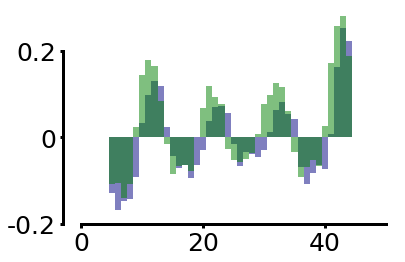

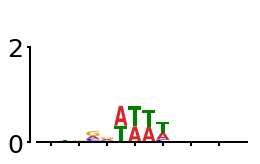

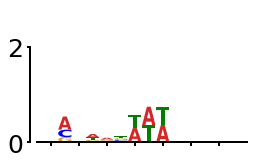

In [11]:
filter_num_1 = 57
filter_num_2 = 169
pos_or_neg = 0

plot_second_order_relation(pos_or_neg, filter_num_1, filter_num_2, out_path=None)
show_motif(motifs[filter_num_1], outpath=None)
show_motif(motifs[filter_num_2], outpath=None)

2 3


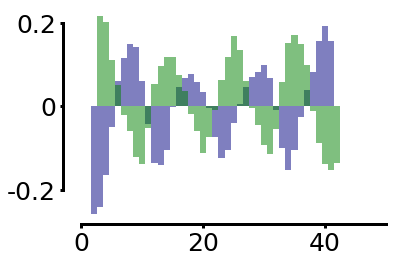

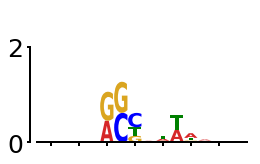

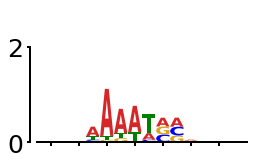

In [13]:
filter_num_1 = 97
filter_num_2 = 150
pos_or_neg = 0

plot_second_order_relation(pos_or_neg, filter_num_1, filter_num_2)
show_motif(motifs[filter_num_1])
show_motif(motifs[filter_num_2])